In [1]:
# the libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in the data from the garage_file.txt with
df_raw = pd.read_csv('garage_file.txt', sep=',', header=None)
# rename the columns into date and value
df_raw.columns = ['date_time', 'sensor_value']
# convert the date_time column into datetime format
df_raw['date_time'] = pd.to_datetime(df_raw['date_time'])

# filter only the numeric value from the sensor_value column using regex
df_raw['sensor_value'] = df_raw['sensor_value'].str.extract('(\d+)')

# convert to sensor_value column into numeric
df_raw['sensor_value'] = pd.to_numeric(df_raw['sensor_value'])

# create a derived column for type base on is the sensor value is below or above the threshold
df_raw['d_type'] = df_raw['sensor_value'].apply(lambda x: 'humid' if x > 35 else 'temp')

# pivot the dataframe from long to wide based on the d_type column
df_pivoted = pd.pivot_table(df_raw, index='date_time', columns='d_type', values='sensor_value')

# convert temp column from celcius to fahrenheit
df_pivoted['temp'] = df_pivoted['temp'].apply(lambda x: (x * 9 / 5) + 32)

# group the dataframe in to 10 minute intervals the mean of the temp and humid columns
df_grouped = df_pivoted.groupby(pd.Grouper(freq='H')).mean()

# drop the first three hours of data
df_grouped = df_grouped.drop(df_grouped.index[:3])

(array([19205., 19209., 19213., 19217., 19221., 19225., 19229., 19233.,
        19236.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

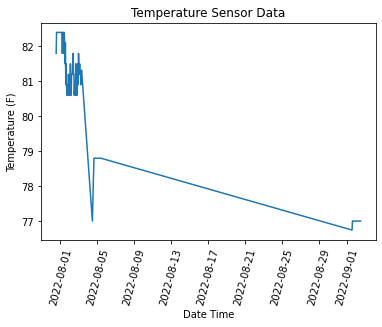

In [3]:
# sns line plot of the temp
sns.lineplot(x='date_time', y='temp', data=df_grouped)
# set the y axis limit at 50
#plt.ylim(75, 90)

# add a title   
plt.title('Temperature Sensor Data')
# add a x label
plt.xlabel('Date Time')
# add a y label
plt.ylabel('Temperature (F)')

# rotate the x-axis labels by 45 degrees
plt.xticks(rotation=75)
